In [2]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
%matplotlib inline
# 需先安裝cifar10 或是等套件自己安裝
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
label = {0:"飛機", 1:"車", 2:"鳥", 3:"貓", 4:"鹿",5:"狗", 6:"青蛙", 7:"馬", 8:"船", 9:"卡車"}

In [8]:
# 檢查 圖片
# a = int(input("請輸入你想可視化的圖片 [0-49999]:"))
# print("你想可視化的圖片號碼是", a)
# print("圖片答案是", label[y_train[a][0]])
# plt.imshow(x_train[a])

In [7]:
from keras.utils import np_utils
x_train_shaped = x_train.astype("float32") / 255
x_test_shaped = x_test.astype("float32") / 255
y_train_cat = np_utils.to_categorical(y_train)
y_test_cat = np_utils.to_categorical(y_test)

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
model = Sequential()
# 第一次卷積和第一次池化
model.add(Conv2D(filters=32,kernel_size=(3, 3),input_shape=(32, 32, 3),
                 activation='relu',padding='same'))
#  32 個特徵 每個 3X3X3 大 [高 寬 RGB] +1 bias 
model.add(MaxPooling2D(pool_size=(2, 2)))
# 斷開 25% 的連接
# 並且加入第二次卷積和第二次池化
model.add(Dropout(0.25))
model.add(Conv2D(filters=64,kernel_size=(3, 3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# 把你處理過的東西攤開成為一維
model.add(Flatten())
model.add(Dropout(rate=0.25))
# 全連接層
model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 4096)              0         
__________

In [10]:
model.compile(loss="categorical_crossentropy",
optimizer = "adam",
metrics = ['accuracy'])
train_history = model.fit(x = x_train_shaped, y = y_train_cat,
                          validation_split = 0.1,epochs = 10,batch_size = 128,verbose = 2)

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
 - 40s - loss: 1.6921 - acc: 0.3835 - val_loss: 1.3530 - val_acc: 0.5296
Epoch 2/10
 - 40s - loss: 1.3492 - acc: 0.5176 - val_loss: 1.2054 - val_acc: 0.5802
Epoch 3/10
 - 40s - loss: 1.2231 - acc: 0.5622 - val_loss: 1.0714 - val_acc: 0.6294
Epoch 4/10
 - 40s - loss: 1.1390 - acc: 0.5970 - val_loss: 1.0177 - val_acc: 0.6516
Epoch 5/10
 - 38s - loss: 1.0659 - acc: 0.6234 - val_loss: 0.9584 - val_acc: 0.6736
Epoch 6/10
 - 39s - loss: 1.0123 - acc: 0.6429 - val_loss: 0.9081 - val_acc: 0.6878
Epoch 7/10
 - 38s - loss: 0.9730 - acc: 0.6534 - val_loss: 0.8818 - val_acc: 0.6974
Epoch 8/10
 - 39s - loss: 0.9386 - acc: 0.6701 - val_loss: 0.8739 - val_acc: 0.7054
Epoch 9/10
 - 38s - loss: 0.9083 - acc: 0.6765 - val_loss: 0.8496 - val_acc: 0.7070
Epoch 10/10
 - 38s - loss: 0.8766 - acc: 0.6899 - val_loss: 0.8150 - val_acc: 0.7254


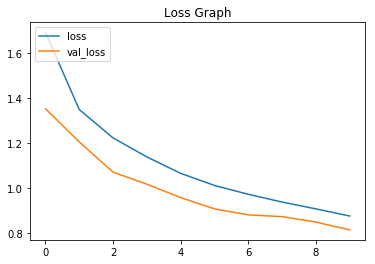

In [11]:
plt.plot(train_history.history["loss"])
plt.plot(train_history.history["val_loss"])
plt.title("Loss Graph")
plt.legend(['loss', 'val_loss'], loc="upper left")